## 데이터분석과 시각화, 머신러닝 알고리즘으로 시간당 공유킥보드 대여량 예측

공유킥보드 대여 데이터를 활용하여, 특정 시간대에 얼마나 많은 사람들이 공유킥보드를 대여하는지 예측하는 것이 목표입니다.

사람들이 공유킥보드를 대여하는데는 많은 요소가 관여되어 있을 겁니다. 

가령 시간(새벽보다 낮에 많이 빌리겠죠), 날씨(비가 오면 공유킥보드를 대여하지 않을 겁니다), 근무일(근무 시간에는 공유킥보드를 대여하지 않겠죠) 등. 이런 모든 요소를 조합하여 공유킥보드 대여량을 예측해주세요. 

이번 경진대회에서는 기존까지 배웠던 프로그래밍 언어와 인공지능&머신러닝 능력 외에도, 공유킥보드 렌탈 시장에 대한 약간의 전문지식, 그리고 일반인의 기초 상식을 총동원 할 수 있습니다.

## 데이터 설명

  * **date** - 시간. 연-월-일 시:분:초 로 표현합니다. (가령 2011-01-01 00:00:00은 2011년 1월 1일 0시 0분 0초)
  * **businessday** - 근무일. 1이면 근무일이며, 0이면 근무일이 아닙니다.
  * **holiday** - 공휴일. 1이면 공휴일이며, 0이면 공휴일이 아닙니다.
  * **season** - 계절. 봄, 여름, 가을, 겨울 순으로 표현합니다.
  * **weather** - 날씨. 1 ~ 4 사이의 값을 가지며, 구체적으로는 다음과 같습니다.
    * 1: 맑은 날씨
    * 2: 약간의 안개와 구름이 끼어있는 날씨
    * 3: 약간의 눈, 비가 오거나 천둥
    * 4: 아주 많은 비가 오거나 우박
  * **humid** - 습도
  * **wind** - 풍속
  * **temp** - 온도
  * **sense_temp** - 체감 온도
  * **onetime** - 비회원의 공유킥보드 대여량.
  * **membership** - 멤버십에 가입한 회원의 공유킥보드 대여량.
  * **count** - 총 공유킥보드 대여랑. 비회원(onetime)과 멤버십 회원(membership)이 대여한 총 공유킥보드 대여량
  
## 프로젝트 구성
* 데이터 로드 (load data)
* 데이터 개요
* 데이터 전처리 (pre-processing)
* 모델 생성
* 검증
* 예측
* 제출 및 점수확인

## 모듈 설치 및 데이터 다운로드

In [75]:
import urllib.request

url = 'https://www.dropbox.com/s/en1xy8x7ru09upg/db-project.py?dl=1'
urllib.request.urlretrieve(url, 'db-project.py')
%run db-project.py


프로젝트: 공유 킥보드 대여량 예측
파일 목록

test.csv
- data/공유 킥보드 대여량 예측/test.csv

train.csv
- data/공유 킥보드 대여량 예측/train.csv

submission.csv
- data/공유 킥보드 대여량 예측/submission.csv



## 모듈 import 

필요한 모듈을 import 합니다. 필요에 따라 추가 패키지를 load 할 수 있습니다.

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# Data 경로 설정
DATA_DIR = 'data'

# 경고 무시
warnings.filterwarnings('ignore')

SEED=2023

train = pd.read_csv(os.path.join(DATA_DIR, project_name, 'train.csv'))
test = pd.read_csv(os.path.join(DATA_DIR, project_name, 'test.csv'))

## 데이터 로드

**본 데이터 분석 대회**에서는 2개의 데이터 셋트와 1개의 제출용 csv 파일을 나누어 제공합니다.

1. train: 학습용 데이터 세트. 정답 값이라고 할 수 있는 `label` 값이 같이 제공됩니다.
2. test: 예측용 데이터 세트. 정답 값이 빠진 `feature` 들만 제공됩니다. 우리는 이 `feature`를 활용하여 예측을 진행합니다.
3. submission: 정답 제출용 데이터 세트. 주어진 형식에 맞춰 정답 값을 기입하고 제출합니다.

## 데이터 개요 확인

로드한 DataFrame의 가장 기본적인 데이터 구조 및 결측치를 확인합니다.

In [78]:
# train 앞 부분 5개 행 출력
# 코드입력
train.head()

,date,businessday,holiday,season,weather,humid,wind,temp,sense_temp,onetime,membership,count
0,2011-01-01 00:00:00,0,0,1,1,81,0.0,9.84,14.395,3,13,16
1,2011-01-01 01:00:00,0,0,1,1,80,0.0,9.02,13.635,8,32,40
2,2011-01-01 02:00:00,0,0,1,1,80,0.0,9.02,13.635,5,27,32
3,2011-01-01 03:00:00,0,0,1,1,75,0.0,9.84,14.395,3,10,13
4,2011-01-01 04:00:00,0,0,1,1,75,0.0,9.84,14.395,0,1,1


In [79]:
# test 앞 부분 5개 행 출력
# 코드입력
test.head()

,date,businessday,holiday,season,weather,humid,wind,temp,sense_temp
0,2011-01-20 00:00:00,1,0,1,1,56,26.0027,10.66,11.365
1,2011-01-20 01:00:00,1,0,1,1,56,0.0000,10.66,13.635
2,2011-01-20 02:00:00,1,0,1,1,56,0.0000,10.66,13.635
3,2011-01-20 03:00:00,1,0,1,1,56,11.0014,10.66,12.880
4,2011-01-20 04:00:00,1,0,1,1,56,11.0014,10.66,12.880


In [80]:
# train, test 의 shape 확인
# 코드입력
train.shape, test.shape

((10886, 12), (6493, 9))

In [81]:
# train column 별 데이터 개수, 타입 확인
# 코드입력
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         10886 non-null  object 
 1   businessday  10886 non-null  int64  
 2   holiday      10886 non-null  int64  
 3   season       10886 non-null  int64  
 4   weather      10886 non-null  int64  
 5   humid        10886 non-null  int64  
 6   wind         10886 non-null  float64
 7   temp         10886 non-null  float64
 8   sense_temp   10886 non-null  float64
 9   onetime      10886 non-null  int64  
 10  membership   10886 non-null  int64  
 11  count        10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [82]:
# test column 별 데이터 개수, 타입 확인
# 코드입력
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6493 non-null   object 
 1   businessday  6493 non-null   int64  
 2   holiday      6493 non-null   int64  
 3   season       6493 non-null   int64  
 4   weather      6493 non-null   int64  
 5   humid        6493 non-null   int64  
 6   wind         6493 non-null   float64
 7   temp         6493 non-null   float64
 8   sense_temp   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [83]:
# train 결측치 확인 
# 코드입력
train.isnull().sum()

date           0
businessday    0
holiday        0
season         0
weather        0
humid          0
wind           0
temp           0
sense_temp     0
onetime        0
membership     0
count          0
dtype: int64

In [84]:
# test 결측치 확인
# 코드입력
test.isnull().sum()

date           0
businessday    0
holiday        0
season         0
weather        0
humid          0
wind           0
temp           0
sense_temp     0
dtype: int64

In [85]:
# datetime 컬럼 변환
# datetime64 타입으로 변환
# train 데이터셋 
# 코드입력
train['date'] = pd.to_datetime(train['date'])

In [86]:
# 검증코드
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         10886 non-null  datetime64[ns]
 1   businessday  10886 non-null  int64         
 2   holiday      10886 non-null  int64         
 3   season       10886 non-null  int64         
 4   weather      10886 non-null  int64         
 5   humid        10886 non-null  int64         
 6   wind         10886 non-null  float64       
 7   temp         10886 non-null  float64       
 8   sense_temp   10886 non-null  float64       
 9   onetime      10886 non-null  int64         
 10  membership   10886 non-null  int64         
 11  count        10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [87]:
# 연도(year), 월(month), 일(day), 요일(dayofweek), 분기(quarter), 시(hour), 분(minute), 초(second) 컬럼 생성
# 생성된 컬럼에 date 컬럼으로부터 정보를 추출하여 대입
# train 데이터셋 
# 코드입력
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day
train['dayofweek'] = train['date'].dt.dayofweek
train['quarter'] = train['date'].dt.quarter
train['hour'] = train['date'].dt.hour
train['minute'] = train['date'].dt.minute
train['second'] = train['date'].dt.second

In [88]:
# 연도(year), 월(month), 일(day), 요일(dayofweek), 분기(quarter), 시(hour), 분(minute), 초(second) 컬럼 상위 5개 행 출력
# train 데이터셋
# 코드입력
train[['year', 'month', 'day', 'dayofweek', 'quarter', 'hour', 'month', 'second']].head()

,year,month,day,dayofweek,quarter,hour,month,second
0,2011,1,1,5,1,0,1,0
1,2011,1,1,5,1,1,1,0
2,2011,1,1,5,1,2,1,0
3,2011,1,1,5,1,3,1,0
4,2011,1,1,5,1,4,1,0


In [89]:
# date 컬럼 변환
# date64 타입으로 변환
# test 데이터셋 
# 코드입력
test['date'] = pd.to_datetime(test['date'])

In [90]:
# 검증코드
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         6493 non-null   datetime64[ns]
 1   businessday  6493 non-null   int64         
 2   holiday      6493 non-null   int64         
 3   season       6493 non-null   int64         
 4   weather      6493 non-null   int64         
 5   humid        6493 non-null   int64         
 6   wind         6493 non-null   float64       
 7   temp         6493 non-null   float64       
 8   sense_temp   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [91]:
# 연도(year), 월(month), 일(day), 요일(dayofweek), 분기(quarter), 시(hour), 분(minute), 초(second) 컬럼 생성
# 생성된 컬럼에 date 컬럼으로부터 정보를 추출하여 대입
# test 데이터셋
# 코드입력
test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['day'] = test['date'].dt.day
test['dayofweek'] = test['date'].dt.dayofweek
test['quarter'] = test['date'].dt.quarter
test['hour'] = test['date'].dt.hour
test['minute'] = test['date'].dt.minute
test['second'] = test['date'].dt.second

In [92]:
# 연도(year), 월(month), 일(day), 요일(dayofweek), 분기(quarter), 시(hour), 분(minute), 초(second) 컬럼 상위 5개 행 출력
# test 데이터셋 
# 코드입력
test[['year', 'month', 'day', 'dayofweek', 'quarter', 'hour', 'month', 'second']].head()

,year,month,day,dayofweek,quarter,hour,month,second
0,2011,1,20,3,1,0,1,0
1,2011,1,20,3,1,1,1,0
2,2011,1,20,3,1,2,1,0
3,2011,1,20,3,1,3,1,0
4,2011,1,20,3,1,4,1,0


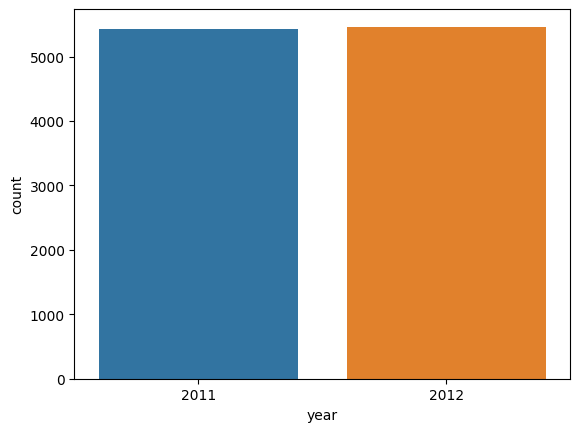

In [93]:
# 연도(year)별 데이터셋 개수 시각화(countplot)
# 코드입력
sns.countplot(x='year', data=train)
plt.show()

### day 컬럼

In [94]:
# day의 분포 확인
train['day'].value_counts()

1     575
9     575
17    575
5     575
16    574
15    574
14    574
13    574
19    574
8     574
7     574
4     574
2     573
12    573
3     573
6     572
10    572
11    568
18    563
Name: day, dtype: int64

In [95]:
# train 의 day 분포
sorted(train['day'].value_counts().keys())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [96]:
# test 의 day 분포
sorted(test['day'].value_counts().keys())

[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]

In [97]:
# 월별(month)별 평균 온도(temp)
# train 데이터셋
# 코드입력
pd.DataFrame(train.groupby('month')['temp'].mean())

,temp
month,
1,9.840000
2,11.798535
3,15.902175
4,18.718372
5,22.674079
6,27.064496
7,30.841711
8,29.736689
9,25.779032


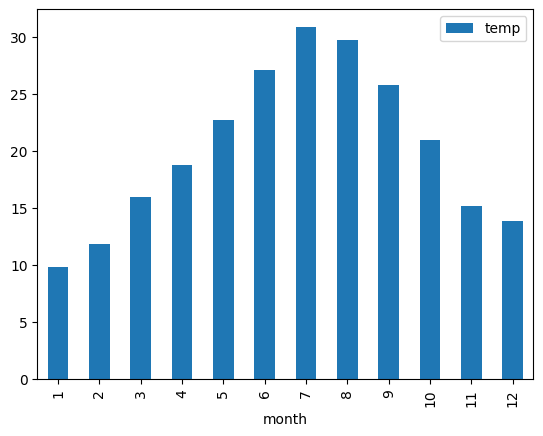

In [98]:
# 월별(month)별 평균 온도(temp) 시각화(bar-dataframe)
# train 데이터셋
# 코드입력
pd.DataFrame(train.groupby('month')['temp'].mean()).plot(kind='bar')
plt.show()

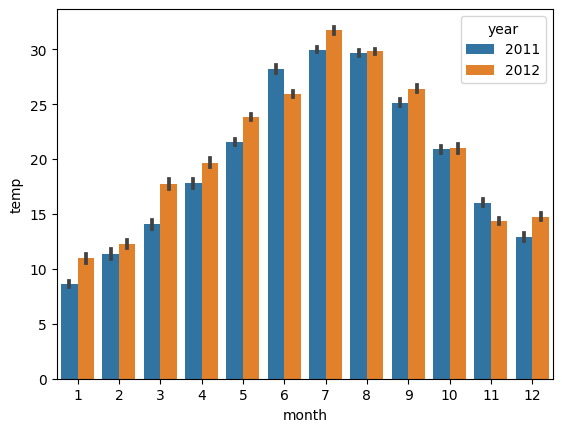

In [99]:
# 월별(month)별 / 연도(year)별 평균 온도(temp) 시각화(barplot-seaborn)
# train 데이터셋
# 코드입력
sns.barplot(x='month', y='temp', hue='year', data=train)
plt.show()

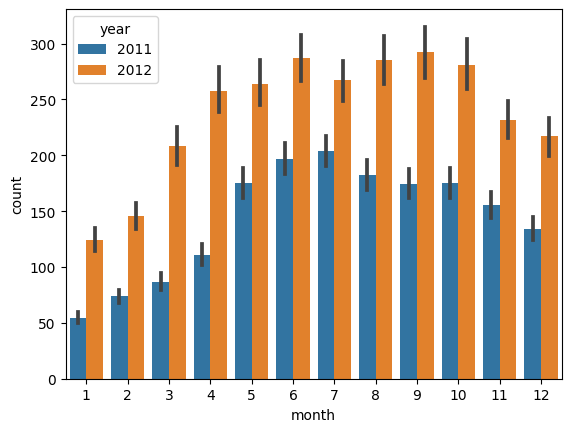

In [100]:
# 월별(month)별 / 연도(year)별 평균 대여량(count) 시각화(barplot-seaborn)
# train 데이터셋
# 코드입력
sns.barplot(x='month', y='count', hue='year', data=train)
plt.show()

In [101]:
# 분기별 데이터 분포 확인
# train 데이터셋
# 코드입력
train['quarter'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: quarter, dtype: int64

In [102]:
# 시간(hour)별 데이터 분포 확인
# train 데이터셋
# 코드입력
train['hour'].value_counts()

12    456
13    456
22    456
21    456
20    456
19    456
18    456
17    456
16    456
15    456
14    456
23    456
11    455
10    455
9     455
8     455
7     455
6     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: hour, dtype: int64

In [103]:
# 분(minute)별 데이터 분포 확인
# train 데이터셋
# 코드입력
train['minute'].value_counts()

0    10886
Name: minute, dtype: int64

In [104]:
# 초(second)별 데이터 분포 확인
# train 데이터셋
# 코드입력
train['second'].value_counts()

0    10886
Name: second, dtype: int64

분(minute)과 초(second)는 단일 값으로 분포하고 있음을 확인한다.

단일 값으로 구성되어 있는 경우, 머신러닝 모델의 예측에 도움이 되지 않으므로 (모든 값이 동일) 제거한다

In [105]:
# minute, second 컬럼 제거
# 제거 후 상위 5개 행 출력
# train 데이터셋
# 코드입력
train = train.drop(['minute', 'second'], axis=1)
train.head()

,date,businessday,holiday,season,weather,humid,wind,temp,sense_temp,onetime,membership,count,year,month,day,dayofweek,quarter,hour
0,2011-01-01 00:00:00,0,0,1,1,81,0.0,9.84,14.395,3,13,16,2011,1,1,5,1,0
1,2011-01-01 01:00:00,0,0,1,1,80,0.0,9.02,13.635,8,32,40,2011,1,1,5,1,1
2,2011-01-01 02:00:00,0,0,1,1,80,0.0,9.02,13.635,5,27,32,2011,1,1,5,1,2
3,2011-01-01 03:00:00,0,0,1,1,75,0.0,9.84,14.395,3,10,13,2011,1,1,5,1,3
4,2011-01-01 04:00:00,0,0,1,1,75,0.0,9.84,14.395,0,1,1,2011,1,1,5,1,4


In [106]:
# minute, second 컬럼 제거
# 제거 후 상위 5개 행 출력
# test 데이터셋
# 코드입력
test = test.drop(['minute', 'second'], axis=1)
test.head()

,date,businessday,holiday,season,weather,humid,wind,temp,sense_temp,year,month,day,dayofweek,quarter,hour
0,2011-01-20 00:00:00,1,0,1,1,56,26.0027,10.66,11.365,2011,1,20,3,1,0
1,2011-01-20 01:00:00,1,0,1,1,56,0.0000,10.66,13.635,2011,1,20,3,1,1
2,2011-01-20 02:00:00,1,0,1,1,56,0.0000,10.66,13.635,2011,1,20,3,1,2
3,2011-01-20 03:00:00,1,0,1,1,56,11.0014,10.66,12.880,2011,1,20,3,1,3
4,2011-01-20 04:00:00,1,0,1,1,56,11.0014,10.66,12.880,2011,1,20,3,1,4


## day의 train & test 분포 확인

`train`, `test`의 `day` 컬럼에 대한 분포가 다름을 확인할 수 있습니다.

<Axes: >

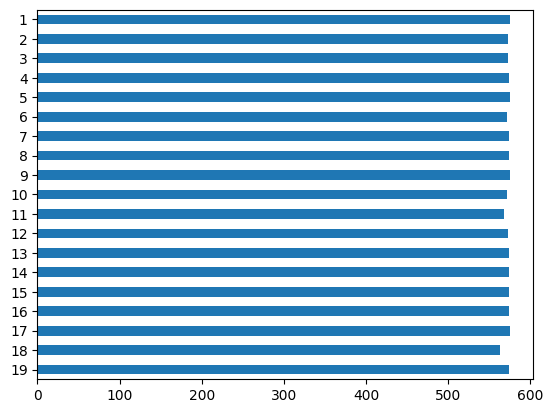

In [107]:
train['day'].value_counts().sort_index(ascending=False).plot(kind='barh')

<Axes: >

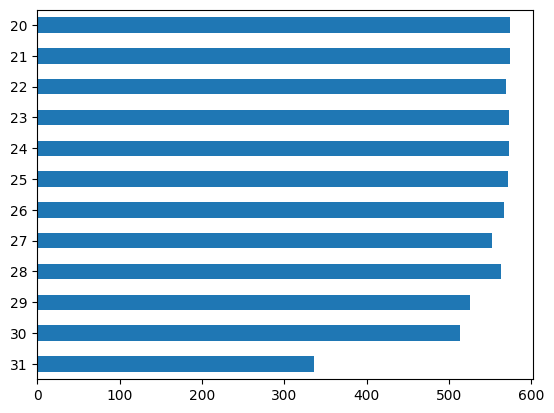

In [108]:
test['day'].value_counts().sort_index(ascending=False).plot(kind='barh')

In [109]:
# weekend 컬럼을 생성(주말)
# 주말인 경우 1, 주중인 경우 0
# 요일(dayofweek)을 참고한다. dayofweek 0: 월요일, 6: 일요일
# weekend 컬럼 상위 5개 출력
# train 데이터셋
# 코드입력
train['weekend'] = train['dayofweek'].apply(lambda x: int(x in [5, 6]))
train['weekend'].value_counts()

0    7723
1    3163
Name: weekend, dtype: int64

In [110]:
# weekend 컬럼을 생성(주말)
# 주말인 경우 1, 주중인 경우 0
# 요일(dayofweek)을 참고한다. dayofweek 0: 월요일, 6: 일요일
# weekend 컬럼 상위 5개 출력
# test 데이터셋
# 코드입력
test['weekend'] = test['dayofweek'].apply(lambda x: int(x in [5, 6]))
test['weekend'].value_counts()

0    4642
1    1851
Name: weekend, dtype: int64

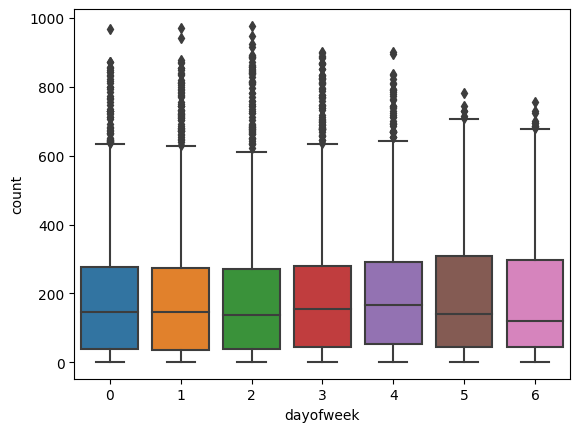

In [111]:
# 요일별 공유 킥보드 데이터 시각화(boxplot)
# y컬럼: count
# train 데이터셋
# 코드입력
sns.boxplot(x='dayofweek', y='count', data=train)
plt.show()

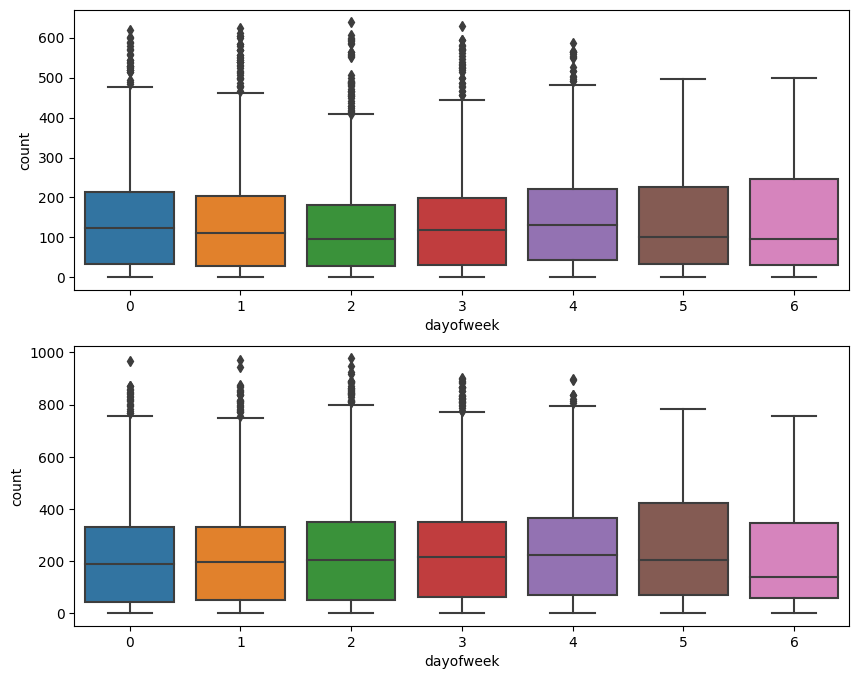

In [112]:
# 2011년 / 2012 요일별 공유 킥보드 데이터 시각화(boxplot)
# y컬럼: count
# figure 사이즈는 (10, 8). 힌트) fig.set_size_inches(10, 8)
# train 데이터셋
fig, axes = plt.subplots(2, 1)
fig.set_size_inches(10, 8)
# 코드입력
sns.boxplot(x='dayofweek', y='count',data=train.loc[train['year']==2011], ax=axes[0])
sns.boxplot(x='dayofweek', y='count',data=train.loc[train['year']==2012], ax=axes[1])

plt.show()

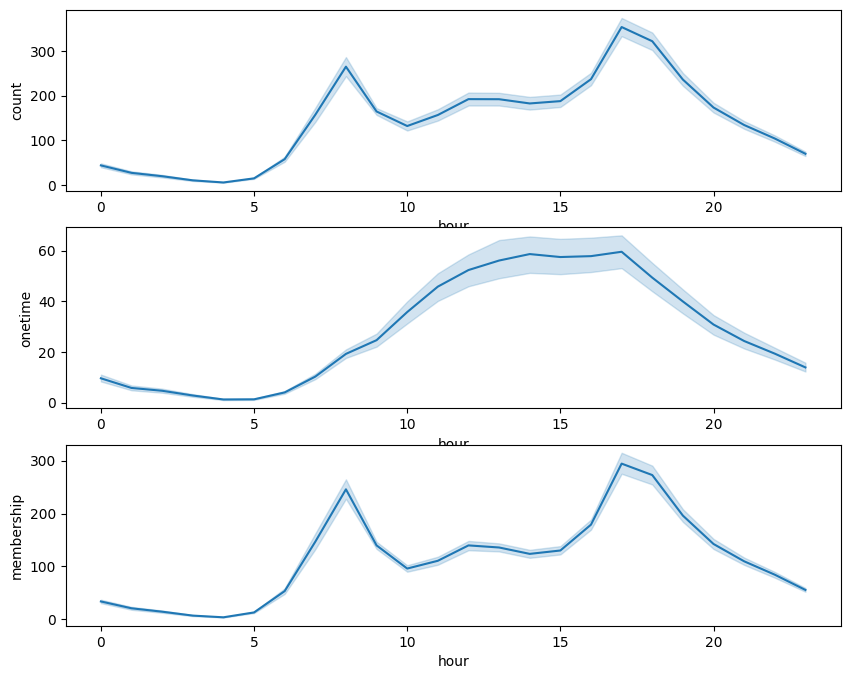

In [113]:
# 2011년 요일별 공유 킥보드 데이터 시각화(pointplot)
# y컬럼: count, onetime, membership
# figure 사이즈는 (10, 8). 힌트) fig.set_size_inches(10, 8)
# train 데이터셋
fig, axes = plt.subplots(3, 1)
fig.set_size_inches(10, 8)

# 코드입력
sns.lineplot(x='hour', y='count', data=train.loc[train['year']==2011], ax=axes[0])
sns.lineplot(x='hour', y='onetime',data=train.loc[train['year']==2011], ax=axes[1])
sns.lineplot(x='hour', y='membership',data=train.loc[train['year']==2011], ax=axes[2])

plt.show()

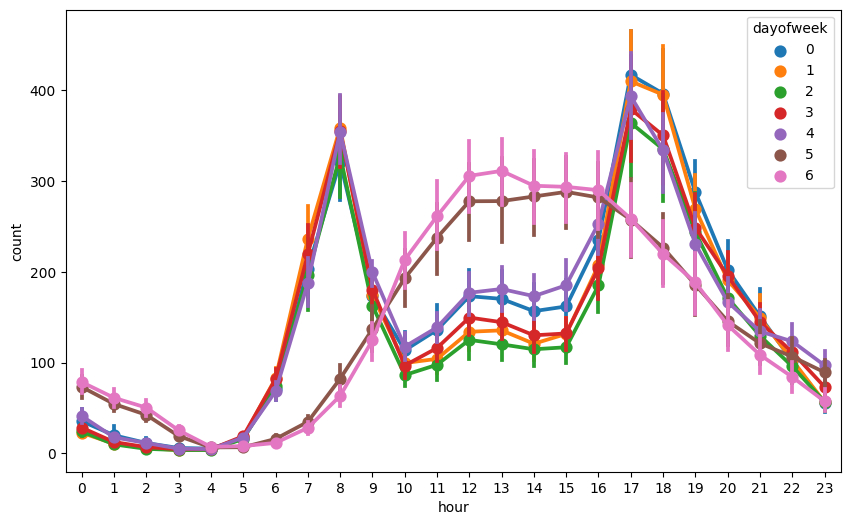

In [114]:
# 2011년 요일별 공유 킥보드 데이터 시각화(pointplot)
# y컬럼: count
# 요일별로 그래프를 그립니다.
# train 데이터셋
plt.figure(figsize=(10, 6))

# 코드입력
sns.pointplot(x='hour', y='count', hue='dayofweek', data=train.loc[train['year']==2011])

plt.show()

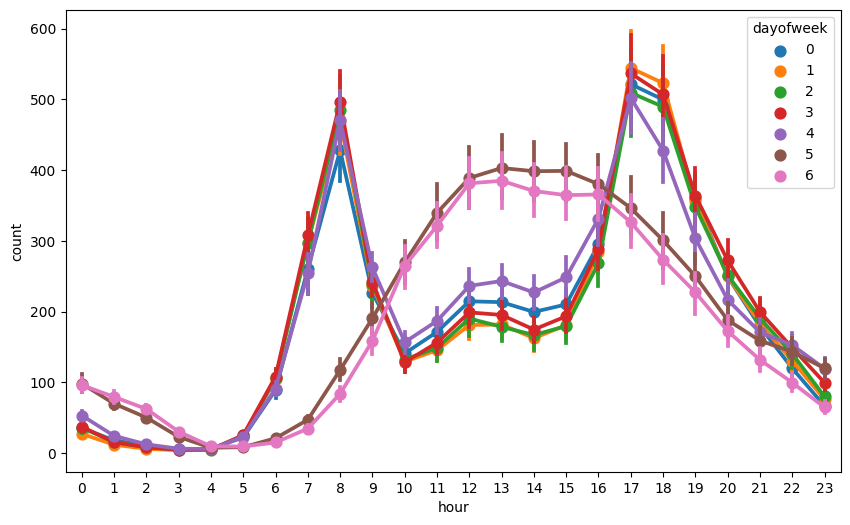

In [115]:
# 시간에 따른 요일(dayofweek)별 공유 킥보드 데이터 시각화(pointplot)
# y컬럼: count
# train 데이터셋
plt.figure(figsize=(10, 6))

# 코드입력
sns.pointplot(x='hour', y='count', hue='dayofweek', data=train)

plt.show()

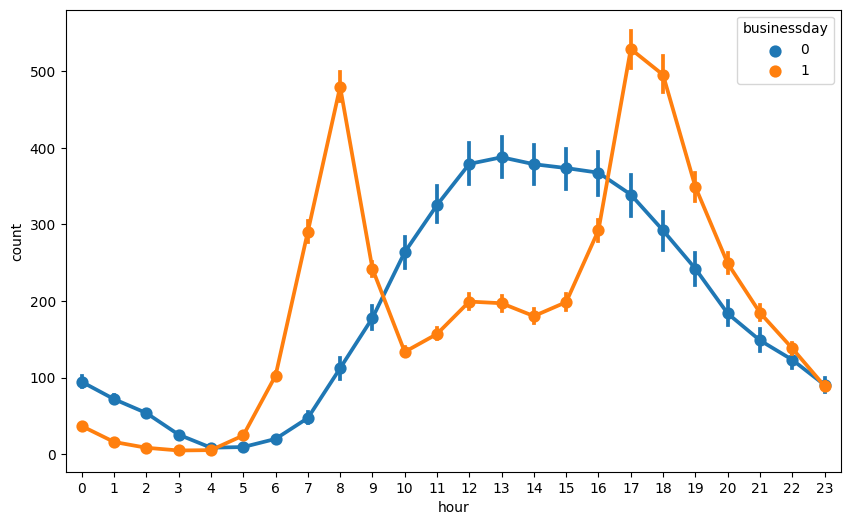

In [116]:
# 시간에 따른 businessday별 공유 킥보드 데이터 시각화(pointplot)
# y컬럼: count
# businessday별로 그래프를 그립니다.
# train 데이터셋
plt.figure(figsize=(10, 6))

# 코드입력
sns.pointplot(x='hour', y='count', hue='businessday', data=train)

plt.show()

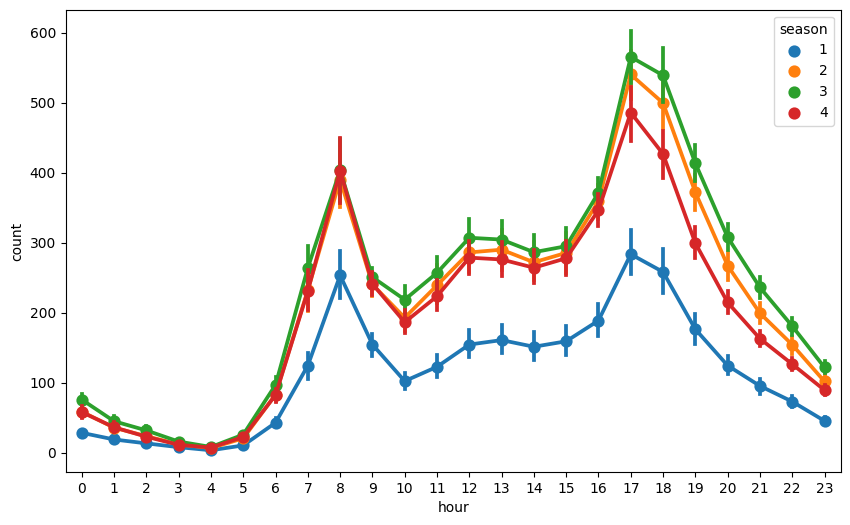

In [117]:
# 시간에 따른 season별 공유 킥보드 데이터 시각화(pointplot)
# y컬럼: count
# season별로 그래프를 그립니다.
# train 데이터셋
plt.figure(figsize=(10, 6))

# 코드입력
sns.pointplot(x='hour', y='count', hue='season', data=train)

plt.show()

In [118]:
# temp, sense_temp, weather, count, onetime, membership 의 상관관계 출력
# train 데이터셋
# 코드입력
train[['temp', 'sense_temp', 'weather', 'count', 'onetime', 'membership']].corr()

,temp,sense_temp,weather,count,onetime,membership
temp,1.000000,0.984948,-0.055035,0.394454,0.467097,0.318571
sense_temp,0.984948,1.000000,-0.055376,0.389784,0.462067,0.314635
weather,-0.055035,-0.055376,1.000000,-0.128655,-0.135918,-0.109340
count,0.394454,0.389784,-0.128655,1.000000,0.690414,0.970948
onetime,0.467097,0.462067,-0.135918,0.690414,1.000000,0.497250
membership,0.318571,0.314635,-0.109340,0.970948,0.497250,1.000000


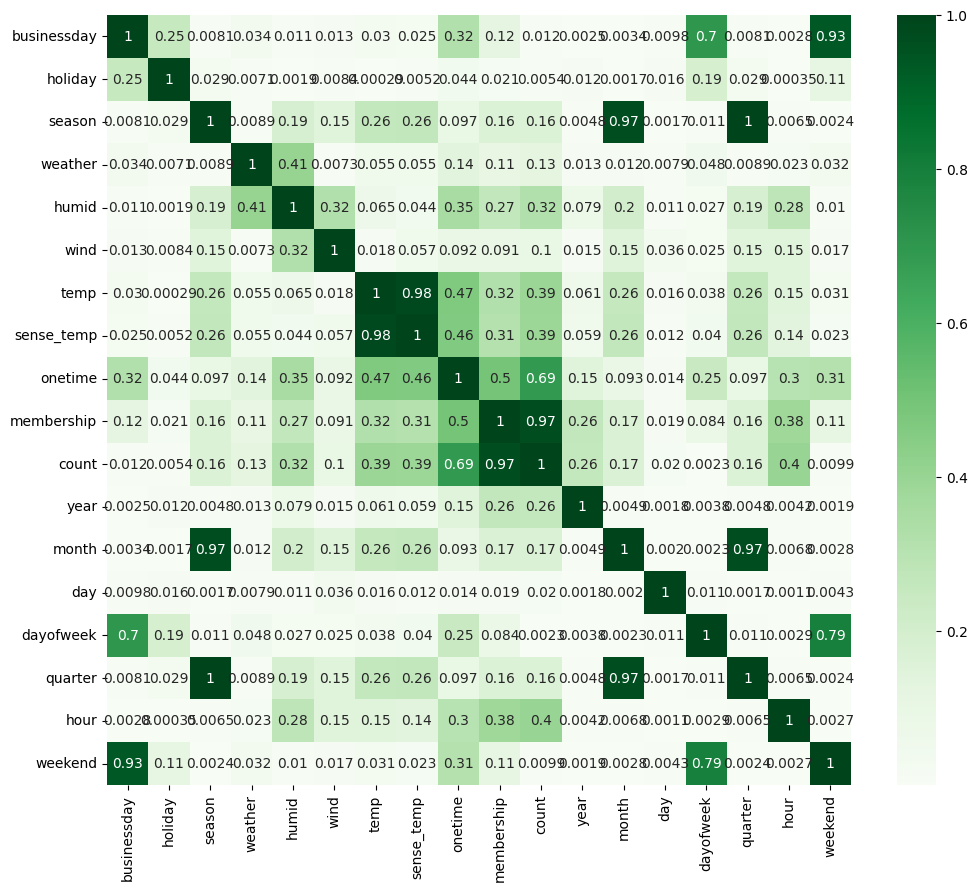

In [119]:
# train 데이터셋 모든 컬럼에 대한 상관관계 시각화(heatmap)
# annot=True 옵션 적용
# cmap='Greens'
# train 데이터셋
plt.figure(figsize=(12, 10))
# 코드입력
sns.heatmap(abs(train.corr()), annot=True, cmap='Greens')
plt.show()

**다중공선성 문제(Multicollinearity)** 는 통계학의 회귀분석에서 **독립변수들 간에 강한 상관관계** 가 나타나는 문제이다. 적절한 회귀분석을 위해 해결해야 하는 문제가 된다.

해결방법)

- 상관관계가 높은 독립변수 중 하나 혹은 일부를 제거
- 변수를 변환

In [120]:
# sense_temp를 제거 합니다.
# train, test 데이터셋 모두 적용
# 코드입력
train = train.drop('sense_temp', axis=1)
test = test.drop('sense_temp', axis=1)

In [121]:
train.head()

,date,businessday,holiday,season,weather,humid,wind,temp,onetime,membership,count,year,month,day,dayofweek,quarter,hour,weekend
0,2011-01-01 00:00:00,0,0,1,1,81,0.0,9.84,3,13,16,2011,1,1,5,1,0,1
1,2011-01-01 01:00:00,0,0,1,1,80,0.0,9.02,8,32,40,2011,1,1,5,1,1,1
2,2011-01-01 02:00:00,0,0,1,1,80,0.0,9.02,5,27,32,2011,1,1,5,1,2,1
3,2011-01-01 03:00:00,0,0,1,1,75,0.0,9.84,3,10,13,2011,1,1,5,1,3,1
4,2011-01-01 04:00:00,0,0,1,1,75,0.0,9.84,0,1,1,2011,1,1,5,1,4,1


<Axes: xlabel='onetime', ylabel='Count'>

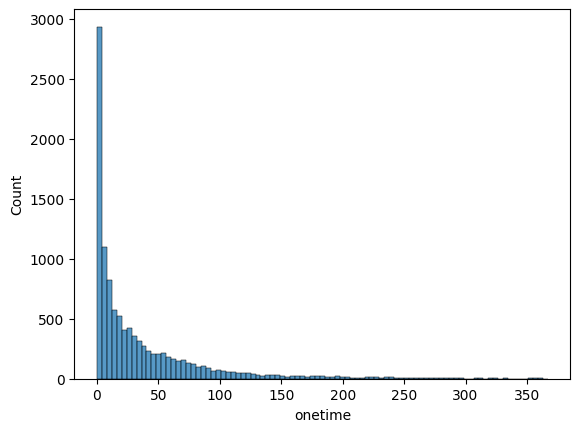

In [122]:
sns.histplot(train['onetime'])

## 분포 확인

## Feature(컬럼) 선택

In [123]:
test.columns

Index(['date', 'businessday', 'holiday', 'season', 'weather', 'humid', 'wind',
       'temp', 'year', 'month', 'day', 'dayofweek', 'quarter', 'hour',
       'weekend'],
      dtype='object')

분석을 토대로 머신러닝 알고리즘에 입력할 feature(컬럼)를 선택합니다.

In [124]:
# 본인의 판단에 따라 훈련에 사용할 feature와 사용하지 않을 feature를 선택합니다.
features = [
    # 사용하지 않을 feature는 주석 처리합니다.
    'businessday', 
    'holiday',
    'season', 
    'weather', 
    'humid', 
    'wind',
    'temp',
    'year', 
    'month', 
#     'day', # train / test 간 분포가 다르므로 포함하지 않습니다.
    'dayofweek', 
    'hour', 
]

In [125]:
train[features]

,businessday,holiday,season,weather,humid,wind,temp,year,month,dayofweek,hour
0,0,0,1,1,81,0.0000,9.84,2011,1,5,0
1,0,0,1,1,80,0.0000,9.02,2011,1,5,1
2,0,0,1,1,80,0.0000,9.02,2011,1,5,2
3,0,0,1,1,75,0.0000,9.84,2011,1,5,3
4,0,0,1,1,75,0.0000,9.84,2011,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...
10881,1,0,4,1,50,26.0027,15.58,2012,12,2,19
10882,1,0,4,1,57,15.0013,14.76,2012,12,2,20
10883,1,0,4,1,61,15.0013,13.94,2012,12,2,21
10884,1,0,4,1,61,6.0032,13.94,2012,12,2,22


## Label(Y값)

In [126]:
# count 값이 Target Label이 됩니다.
train['count']

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

## 훈련(Train) / 검증(Validation) 세트 분할

- random_state=SEED
- test_size=0.2

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
# x에는 정의한 train[features], y에는 'count', random_state=SEED
# 코드입력
x_train, x_test, y_train, y_test = train_test_split(train[features], train['count'], random_state=SEED)

## 모델 정의

In [129]:
from sklearn.ensemble import RandomForestRegressor

In [130]:
# random_state=SEED
# 코드입력
rfc = RandomForestRegressor(random_state=SEED)
rfc.fit(x_train, y_train)

RandomForestRegressor(random_state=2023)

In [131]:
# x_test에 대한 예측
# 결과 값은 pred 변수에 저장
# 코드입력
pred = rfc.predict(x_test)

## 평가지표 & 검증 (Evaluation)

In [132]:
# 평가지표
from sklearn.metrics import mean_squared_log_error

RMSLE = lambda y_true, y_pred: np.sqrt(mean_squared_log_error(y_true, y_pred))

In [133]:
# y_test와 pred 사이의 RMSLE 결과 확인 
# 평가지표 결과 출력
RMSLE(y_test, pred)

0.3294308204894255

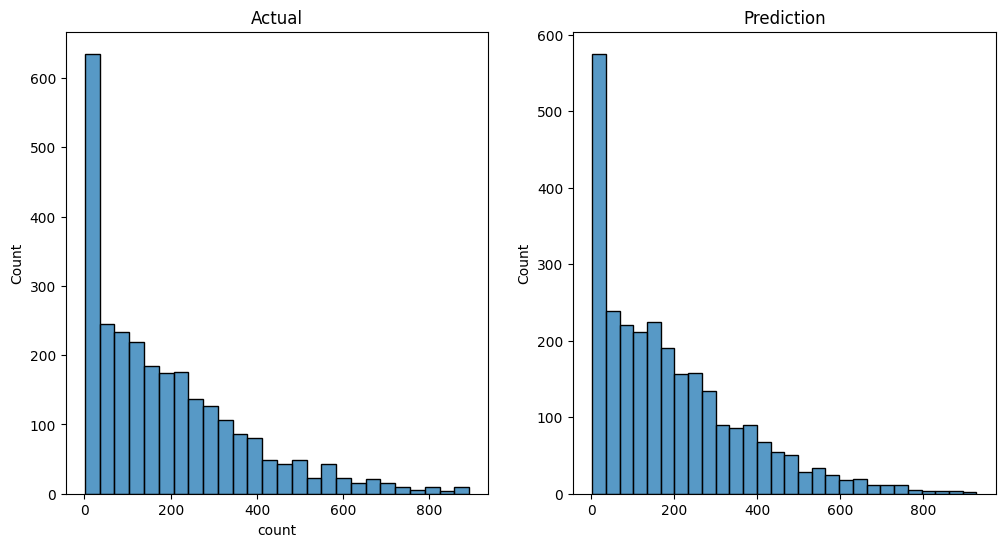

In [134]:
# 실제 값과 예측 값 비교
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12, 6)

# ytest, pred에 대한 히스토그램
# 코드입력
sns.histplot(y_test, ax=axes[0])
sns.histplot(pred, ax=axes[1])

axes[0].set_title('Actual')
axes[1].set_title('Prediction')

plt.show()

In [136]:
# rfc_pred에 RandomForestRegressor의 예측 값 대입
rfc_pred = rfc.predict(test[features])

## split된 데이터로 제출한 경우

In [140]:
# 값에 오류가 없는지 확인
utils.check_error(rfc_pred)

f_name = 'bike-submission-01.csv'
print(f'저장된 파일: {f_name}')
print(f'제출주소: https://www.kaggle.com/c/bike-sharing-demand')

# 예측 결과 업데이트
submission = pd.read_csv(os.path.join(DATA_DIR, project_name, 'submission.csv'))
submission['count'] = rfc_pred
display(submission)
submission.to_csv(f_name, index=False)

[통과] 문제가 발견되지 않았습니다.
저장된 파일: bike-submission-01.csv
제출주소: https://www.kaggle.com/c/bike-sharing-demand


,datetime,count
0,2011-01-20 00:00:00,12.11
1,2011-01-20 01:00:00,5.17
2,2011-01-20 02:00:00,3.54
3,2011-01-20 03:00:00,3.51
4,2011-01-20 04:00:00,3.08
...,...,...
6488,2012-12-31 19:00:00,305.62
6489,2012-12-31 20:00:00,195.19
6490,2012-12-31 21:00:00,156.55
6491,2012-12-31 22:00:00,106.60


## 전체 데이터로 재학습하여 제출한 경우

In [141]:
x = train[features]
y = train['count']
rfc.fit(x, y)
rfc_pred = rfc.predict(test[features])

In [143]:
# 값에 오류가 없는지 확인
utils.check_error(rfc_pred)

f_name = 'bike-submission-02.csv'
print(f'저장된 파일: {f_name}')
print(f'제출주소: https://www.kaggle.com/c/bike-sharing-demand')

# 예측 결과 업데이트
submission = pd.read_csv(os.path.join(DATA_DIR, project_name, 'submission.csv'))
submission['count'] = rfc_pred
display(submission)
submission.to_csv(f_name, index=False)

[통과] 문제가 발견되지 않았습니다.
저장된 파일: bike-submission-02.csv
제출주소: https://www.kaggle.com/c/bike-sharing-demand


,datetime,count
0,2011-01-20 00:00:00,10.92
1,2011-01-20 01:00:00,4.88
2,2011-01-20 02:00:00,3.69
3,2011-01-20 03:00:00,3.24
4,2011-01-20 04:00:00,2.93
...,...,...
6488,2012-12-31 19:00:00,296.05
6489,2012-12-31 20:00:00,203.20
6490,2012-12-31 21:00:00,154.14
6491,2012-12-31 22:00:00,107.40


## 베이스라인 모델 기본 튜닝 (GridSearchCV 활용)

- 사용한 모델: `RandomForestRegressor`

In [144]:
# Hyper Parameter 튜닝
params = {
    'n_estimators': [200, 300, 500, 750], 
    'max_depth': [5, 8, 11, None], 
    'random_state': [SEED],
}

# from sklearn.utils import parallel_backend
from sklearn.model_selection import GridSearchCV

# 코드입력
grid_search = GridSearchCV(RandomForestRegressor(), params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'max_depth': None, 'n_estimators': 750, 'random_state': 2023}

In [145]:
# Best Parameter 출력
grid_search.best_params_

{'max_depth': None, 'n_estimators': 750, 'random_state': 2023}

In [146]:
# 튜닝한 값 적용
# 코드입력
rfc_grid = RandomForestRegressor(**grid_search.best_params_)

rfc_grid.fit(x_train, y_train)
pred = rfc_grid.predict(x_test)
RMSLE(pred, y_test)

0.32959500752498255

## 튜닝 후 결과 제출

In [147]:
# test 데이터셋에 대한 예측
# pred 변수에 예측에 대한 결과값 대입
# 코드입력
rfc_grid.fit(x, y)
rfc_pred2 = rfc_grid.predict(test[features])

In [148]:
# 값에 오류가 없는지 확인
utils.check_error(rfc_pred2)

f_name = 'bike-submission-03.csv'
print(f'저장된 파일: {f_name}')
print(f'제출주소: https://www.kaggle.com/c/bike-sharing-demand')

# 예측 결과 업데이트
submission = pd.read_csv(os.path.join(DATA_DIR, project_name, 'submission.csv'))
submission['count'] = rfc_pred
display(submission)
submission.to_csv(f_name, index=False)

[통과] 문제가 발견되지 않았습니다.
저장된 파일: bike-submission-03.csv
제출주소: https://www.kaggle.com/c/bike-sharing-demand


,datetime,count
0,2011-01-20 00:00:00,10.92
1,2011-01-20 01:00:00,4.88
2,2011-01-20 02:00:00,3.69
3,2011-01-20 03:00:00,3.24
4,2011-01-20 04:00:00,2.93
...,...,...
6488,2012-12-31 19:00:00,296.05
6489,2012-12-31 20:00:00,203.20
6490,2012-12-31 21:00:00,154.14
6491,2012-12-31 22:00:00,107.40


## Y Label 값 스케일 변환 (Log Transformation 적용)

정규 분포가 아닌 Y 값을 정규 분포로 만들어 성능 향상을 기대할 수 있습니다.

In [149]:
print(f'log: {np.log(1)}')
print(f'log1p == log(x+1): {np.log1p(0)}')

log: 0.0
log1p == log(x+1): 0.0


log <==> exp 관계

In [150]:
a = np.log(10)
print(f'log({10:.1f}) = {a:.4f}')
reverse_a = np.exp(a)
print(f'np.exp({a:.4f}) = {reverse_a:.1f}')

log(10.0) = 2.3026
np.exp(2.3026) = 10.0


log1p <==> expm1 관계

In [151]:
a = np.log1p(10)
print(f'log1p({10:.1f}) = {a:.4f}')
reverse_a = np.expm1(a)
print(f'np.expm1({a:.4f}) = {reverse_a:.1f}')

log1p(10.0) = 2.3979
np.expm1(2.3979) = 10.0


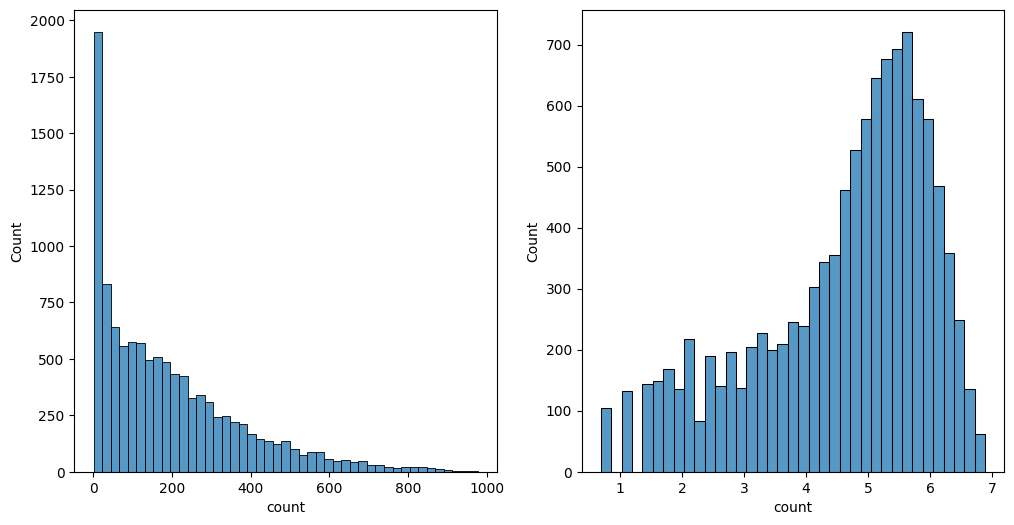

In [152]:
# 분포 확인(histplot)
# count 컬럼
# train 데이터셋
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12, 6)

# train['count'], 로그 스케일한 np.log1p(train['count']) 시각화
# 코드입력
sns.histplot(train['count'], ax=axes[0])
sns.histplot(np.log1p(train['count']), ax=axes[1])

plt.show()

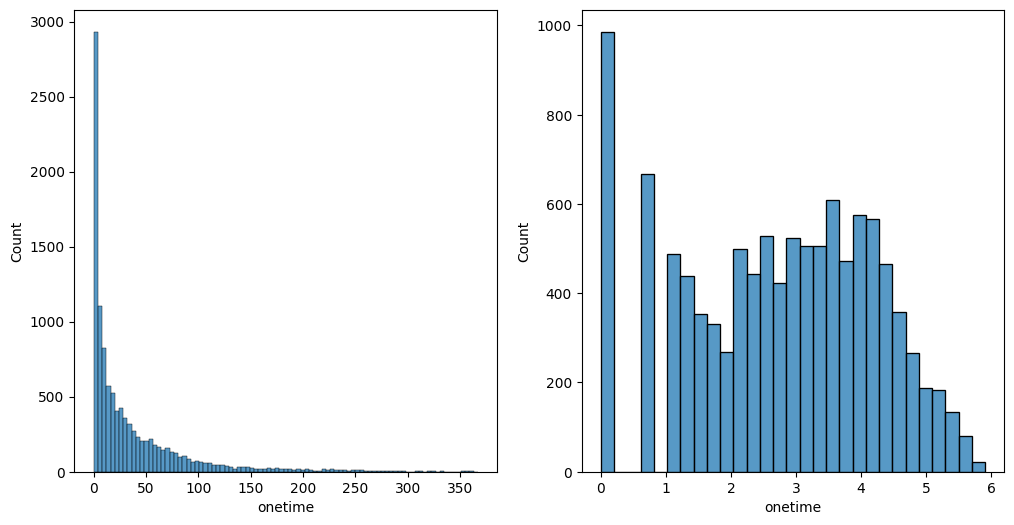

In [153]:
# 분포 확인(histplot)
# onetime 컬럼
# train 데이터셋
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12, 6)

# train['onetime'], 로그 스케일한 np.log1p(train['onetime']) 시각화
# 코드입력
sns.histplot(train['onetime'], ax=axes[0])
sns.histplot(np.log1p(train['onetime']), ax=axes[1])

plt.show()

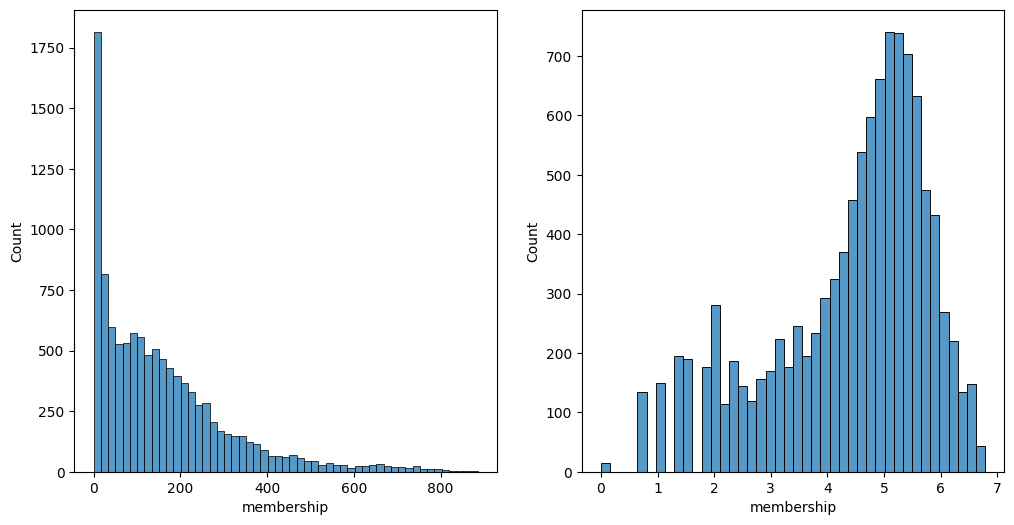

In [154]:
# 분포 확인(histplot)
# membership 컬럼
# train 데이터셋
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12, 6)

# train['membership'], 로그 스케일한 np.log1p(train['membership']) 시각화
# 코드입력
sns.histplot(train['membership'], ax=axes[0])
sns.histplot(np.log1p(train['membership']), ax=axes[1])

plt.show()

In [155]:
# onetime, membership, count에 대하여 log1p 변환을 하고
# onetime_log, membership_log, count_log 컬럼을 생성한 후 대입합니다.
# train 데이터셋 적용
# 코드입력
train['onetime_log'] = np.log1p(train['onetime'])
train['membership_log'] = np.log1p(train['membership'])
train['count_log'] = np.log1p(train['count'])

In [156]:
# x에는 정의한 train[features], 
# y에는 'count_log', 
# random_state=SEED, test_size=0.2
# 코드입력
x_train, x_test, y_train, y_test = train_test_split(train[features], train['count_log'], random_state=SEED)

In [157]:
# RandomForestRegressor로 예측
# n_estimators=500, random_state=SEED
# 모델 정의 및 학습(fit)
# 코드입력
rfc3 = RandomForestRegressor(n_estimators=500, random_state=SEED)
rfc3.fit(x_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=2023)

In [158]:
# x_test를 입력 값으로 예측합니다.
# y_test_pred 변수에 결과를 저장합니다.
# 코드입력
y_test_pred = rfc3.predict(x_test)

In [159]:
# 검증코드 (0.28~ 0.30 사이의 결과 값이 출력되어야 함)
# y_test와 y_test_pred 사이의 RMSLE 결과 확인 
# 평가지표 결과 출력
RMSLE(np.expm1(y_test), np.expm1(y_test_pred))

0.29359154074749744

In [160]:
# test[features]를 입력 값으로 예측합니다.
# pred2 변수에 결과를 저장합니다.
# 코드입력
y = np.log1p(train['count'])
rfc3.fit(x, y)
rfc_pred3 = rfc3.predict(test[features])
# 역변환
rfc_pred3 = np.expm1(rfc_pred3)

## Log 스케일 후 예측 결과

In [162]:
# 값에 오류가 없는지 확인
utils.check_error(rfc_pred3)

f_name = 'bike-submission-03.csv'
print(f'저장된 파일: {f_name}')
print(f'제출주소: https://www.kaggle.com/c/bike-sharing-demand')

# 예측 결과 업데이트
submission = pd.read_csv(os.path.join(DATA_DIR, project_name, 'submission.csv'))
submission['count'] = rfc_pred
display(submission)
submission.to_csv(f_name, index=False)

[통과] 문제가 발견되지 않았습니다.
저장된 파일: bike-submission-03.csv
제출주소: https://www.kaggle.com/c/bike-sharing-demand


,datetime,count
0,2011-01-20 00:00:00,10.92
1,2011-01-20 01:00:00,4.88
2,2011-01-20 02:00:00,3.69
3,2011-01-20 03:00:00,3.24
4,2011-01-20 04:00:00,2.93
...,...,...
6488,2012-12-31 19:00:00,296.05
6489,2012-12-31 20:00:00,203.20
6490,2012-12-31 21:00:00,154.14
6491,2012-12-31 22:00:00,107.40


## `membership` / `onetime` 나누어 예측 모델 생성

`count`는 `membership` + `onetime` 입니다.

**총 대여량 = 멤버십 회원 + 일회성 회원 이 빌린 숫자의 합**입니다.

`membership`를 예측하는 모델 / `onetime`을 예측하는 모델 2개를 만들어 각각 예측 후 합산된 결과를 도출합니다.

**요구사항**
- membership_log를 y값으로 예측하는 모델 생성
- onetime_log를 y값으로 예측하는 모델 생성
- train_test_split(random_state=SEED, test_size=0.2)
- RandomForestRegressor 알고리즘 사용 (random_state=SEED, n_estimators=500)

**변수**
- `x_train`, `x_test`: feature 변수
- `y_train_mem`, `y_test_mem `: membership Y 변수
- `y_train_one`, `y_test_one `: onetime Y 변수

In [163]:
train[['onetime', 'membership', 'count']]

,onetime,membership,count
0,3,13,16
1,8,32,40
2,5,27,32
3,3,10,13
4,0,1,1
...,...,...,...
10881,7,329,336
10882,10,231,241
10883,4,164,168
10884,12,117,129


In [164]:
# x_train, x_test 변수 생성
# y_train_mem, y_test_mem 변수 생성
# y_train_one와 y_test_one 변수 생성
x_train, x_test, y_train_mem, y_test_mem = train_test_split(train[features], train['membership_log'], random_state=SEED)
x_train, x_test, y_train_one, y_test_one = train_test_split(train[features], train['onetime_log'], random_state=SEED)

## 모델 정의

In [165]:
# rfc_mem => RandomForestRegressor 를 생성, n_estimators=500, random_state=SEED
# 코드입력
rfc_mem = RandomForestRegressor(n_estimators=500, random_state=SEED)

In [166]:
# 훈련(fit)
# y값: y_train_mem 변수로 설정
# 코드입력
rfc_mem.fit(x_train, y_train_mem)

RandomForestRegressor(n_estimators=500, random_state=2023)

In [167]:
# 예측(predict)
# 입력 값: x_test
# y_pred_mem에 결과값 대입
# 코드입력
y_pred_mem = rfc_mem.predict(x_test)

In [168]:
# np.expm1을 활용하여 역변환 
# 검증 결과(RMSLE)
RMSLE(np.expm1(y_test_mem), np.expm1(y_pred_mem))

0.29050699193326

In [169]:
# rfc_one => RandomForestRegressor 를 생성, n_estimators=600, random_state=SEED
# 코드입력
rfc_one = RandomForestRegressor(n_estimators=600, random_state=SEED)

In [170]:
# 훈련(fit)
# y값: y_train_one 변수로 설정
# 코드입력
rfc_one.fit(x_train, y_train_one)

RandomForestRegressor(n_estimators=600, random_state=2023)

In [171]:
# 예측(predict)
# x_test에 대한 예측
# 코드입력
y_pred_one = rfc_one.predict(x_test)

In [172]:
# np.expm1을 활용하여 역변환
# 검증 결과(RMSLE)
RMSLE(np.expm1(y_test_one), np.expm1(y_pred_one))

0.4937675954497084

In [173]:
# 결과를 합산 합니다.
rfc_pred = np.expm1(y_pred_mem) + np.expm1(y_pred_one)
y_test = np.expm1(y_test_mem) + np.expm1(y_test_one)

In [174]:
# 검증 결과(RMSLE)
RMSLE(y_test, rfc_pred)

0.2900108162813671

## 예측 결과 확인

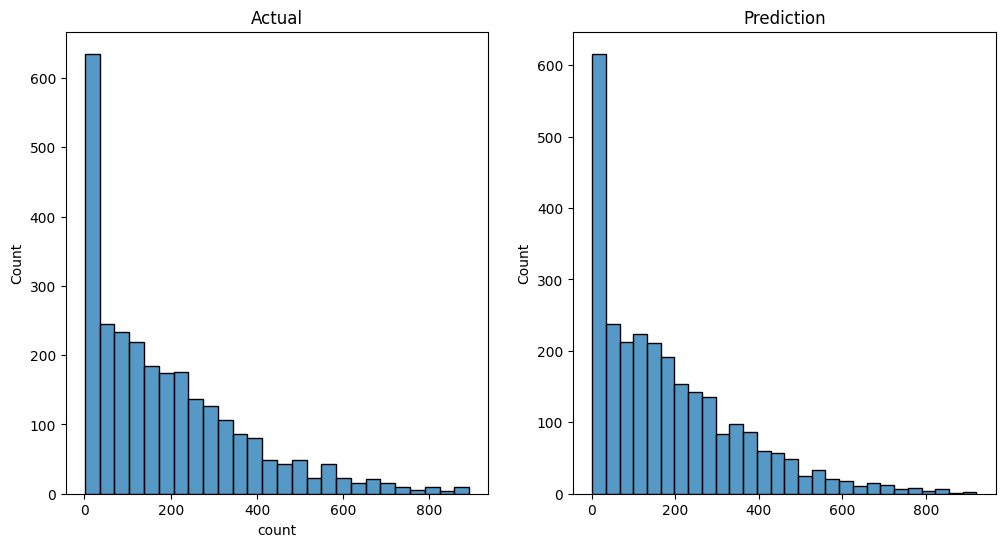

In [175]:
# 실제 값(count)과 예측 값(pred)를 시각화하여 비교합니다.
# 비슷한 분포의 결과가 나오는지 확인합니다.
# histplot
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12, 6)

# count, rtc_pred에 대한 예측 결과 시각화
sns.histplot(train.loc[y_test.index, 'count'], ax=axes[0])
sns.histplot(rfc_pred, ax=axes[1])

axes[0].set_title('Actual')
axes[1].set_title('Prediction')

plt.show()

## membership / onetime 각각 예측

In [176]:
# rfc_mem 모델로 예측
# test[features]를 입력 값
pred_mem = rfc_mem.predict(test[features])
# np.expm1 으로 결과 역변환
pred_mem = np.expm1(pred_mem)

# rfc_one 모델로 예측
pred_one = rfc_one.predict(test[features])
# np.expm1 으로 결과 역변환
pred_one = np.expm1(pred_one)

# pred 변수에 결과를 합산합니다.
rfc_pred = pred_mem + pred_one

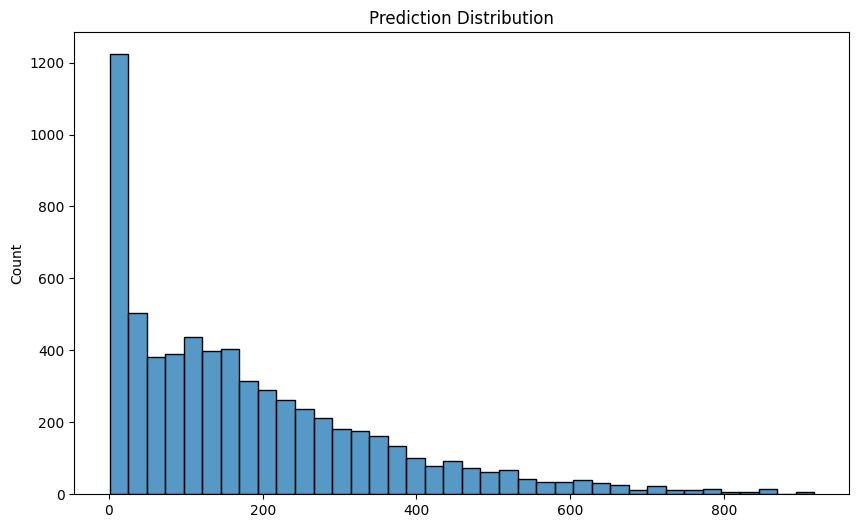

In [177]:
# test 데이터셋에 대하여 예측한 결과 분포도를 시각화
# histplot
plt.figure(figsize=(10, 6))
sns.histplot(rfc_pred)
plt.title('Prediction Distribution')
plt.show()

In [178]:
rfc_mem.fit(x, train['membership_log'])
rfc_one.fit(x, train['onetime_log'])

RandomForestRegressor(n_estimators=600, random_state=2023)

In [179]:
rfc_mem_pred = rfc_mem.predict(test[features])
rfc_mem_pred = np.expm1(rfc_mem_pred)
rfc_one_pred = rfc_one.predict(test[features])
rfc_one_pred = np.expm1(rfc_one_pred)

In [180]:
rfc_pred = rfc_mem_pred + rfc_one_pred

## membership / onetime 모델 각각 생성하여 예측

In [181]:
# 값에 오류가 없는지 확인
utils.check_error(rfc_pred)

f_name = 'bike-submission-04.csv'
print(f'저장된 파일: {f_name}')
print(f'제출주소: https://www.kaggle.com/c/bike-sharing-demand')

# 예측 결과 업데이트
submission = pd.read_csv(os.path.join(DATA_DIR, project_name, 'submission.csv'))
submission['count'] = rfc_pred
display(submission)
submission.to_csv(f_name, index=False)

[통과] 문제가 발견되지 않았습니다.
저장된 파일: bike-submission-04.csv
제출주소: https://www.kaggle.com/c/bike-sharing-demand


,datetime,count
0,2011-01-20 00:00:00,10.696593
1,2011-01-20 01:00:00,5.061730
2,2011-01-20 02:00:00,3.033176
3,2011-01-20 03:00:00,2.200688
4,2011-01-20 04:00:00,2.039424
...,...,...
6488,2012-12-31 19:00:00,308.635187
6489,2012-12-31 20:00:00,204.522026
6490,2012-12-31 21:00:00,151.803573
6491,2012-12-31 22:00:00,107.117947


## Wind: 잘못된 데이터 수정

wind 가 0으로 표기 된 값들이 보입니다.

잘못 된 데이터일 가능성이 있으므로, 머신러닝 예측 후 wind가 0인 값들을 변경하고 다시 학습 데이터로 추가합니다.

In [182]:
train['wind'].value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: wind, dtype: int64

In [183]:
# all_data 변수에 train, test를 합칩니다. 한 번에 전처리 해주기 위함입니다.
# sort=False로 섞이지 않도록 합니다.
all_data = pd.concat([train, test], sort=False)

In [184]:
# wind = 0 인 데이터 개수
all_data.loc[all_data['wind'] == 0].shape[0]

2180

In [185]:
# wind = 0 이 아닌 데이터 개수
all_data.loc[all_data['wind'] != 0].shape[0]

15199

### wind 보간 (interpolation)

- [참고 링크](https://teddylee777.github.io/pandas/pandas-interpolation)

In [186]:
# 결측치로 처리
all_data.loc[all_data['wind'] == 0.0, 'wind'] = np.nan

In [187]:
# 결측치 보간
all_data['wind'] = all_data['wind'].interpolate().bfill()

In [189]:
train_data = all_data[:len(train)]
test_data = all_data[len(train):]

In [190]:
# x_train, x_test 변수 생성
# y_train_mem, y_test_mem 변수 생성
# y_train_one와 y_test_one 변수 생성
x_train, x_test, y_train_mem, y_test_mem = train_test_split(train_data[features], train_data['membership_log'], random_state=SEED)
x_train, x_test, y_train_one, y_test_one = train_test_split(train_data[features], train_data['onetime_log'], random_state=SEED)

In [192]:
rfc_mem = RandomForestRegressor(n_estimators=500, random_state=SEED)
rfc_mem.fit(x_train, y_train_mem)
y_pred_mem = rfc_mem.predict(x_test)

In [193]:
# np.expm1을 활용하여 역변환 
# 검증 결과(RMSLE)
RMSLE(np.expm1(y_test_mem), np.expm1(y_pred_mem))

0.29259596719599723

In [203]:
# rfc_one => RandomForestRegressor 를 생성, n_estimators=600, random_state=SEED
# 코드입력
rfc_one = RandomForestRegressor(n_estimators=600, random_state=SEED)
rfc_one.fit(x_train, y_train_one)
y_pred_one = rfc_one.predict(x_test)

In [204]:
RMSLE(np.expm1(y_test_one), np.expm1(y_pred_one))

0.524788640811451

In [195]:
# 결과를 합산 합니다.
rfc_pred = np.expm1(y_pred_mem) + np.expm1(y_pred_one)
y_test = np.expm1(y_test_mem) + np.expm1(y_test_one)

In [196]:
# 검증 결과(RMSLE)
RMSLE(y_test, rfc_pred)

0.2914193519422437

In [197]:
# rfc_mem 모델로 예측
# test[features]를 입력 값
pred_mem = rfc_mem.predict(test[features])
# np.expm1 으로 결과 역변환
pred_mem = np.expm1(pred_mem)

# rfc_one 모델로 예측
pred_one = rfc_one.predict(test[features])
# np.expm1 으로 결과 역변환
pred_one = np.expm1(pred_one)

# pred 변수에 결과를 합산합니다.
rfc_pred = pred_mem + pred_one

In [198]:
# 값에 오류가 없는지 확인
utils.check_error(rfc_pred)

f_name = 'bike-submission-05.csv'
print(f'저장된 파일: {f_name}')
print(f'제출주소: https://www.kaggle.com/c/bike-sharing-demand')

# 예측 결과 업데이트
submission = pd.read_csv(os.path.join(DATA_DIR, project_name, 'submission.csv'))
submission['count'] = rfc_pred
display(submission)
submission.to_csv(f_name, index=False)

[통과] 문제가 발견되지 않았습니다.
저장된 파일: bike-submission-05.csv
제출주소: https://www.kaggle.com/c/bike-sharing-demand


,datetime,count
0,2011-01-20 00:00:00,12.310269
1,2011-01-20 01:00:00,5.882138
2,2011-01-20 02:00:00,2.883792
3,2011-01-20 03:00:00,2.282713
4,2011-01-20 04:00:00,2.006584
...,...,...
6488,2012-12-31 19:00:00,296.107793
6489,2012-12-31 20:00:00,203.219894
6490,2012-12-31 21:00:00,147.438150
6491,2012-12-31 22:00:00,104.835314
